# Lesson 8 Review and Lesson 9 Prework

## Lesson 8 Review and Coding Tips
1. Coding: cPickle, Pipeline
2. Machine Learning: Fix the Code!

## Lesson 9 Topics
1. Logistic Regression with sklearn
2. Sigmoid Function, odds and odds ratio
3. ROC/AUC

## Lesson 7 Review and Coding Tips

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix
import pandas as pd
import numpy as np

### cPickle (Now _pickle)
cPickle is one of the greatest packages ever. Think of it as a .zip/.rar/.7z file for pandas! It was one of the tools I used frequently when I was working on my capstone. I had to run 6 Random Forests on 6 different target variables. Let's just say that the algorithm was about 1gb each and took 5 hours each to run once on my laptop. So, how did cPickle save me? I wrote a modeling script, which I uploaded into an AWS EC2 instance. I saved all my data as a .pickle file and uploaded it into the AWS instance. Also in my script, I wrote a save .Pickle file to save my GridSearch information. I didn't have to move any csvs or data cleaning, just a .pickle file. Below is what I did for 1 target variable.

#### Testing the Pickle

In [3]:
import _pickle as pickle
os.chdir("/Users/adeniyiharrison/Desktop/")
test = {
    "Name": "Niyi",
    "Job": "Data Analyst",
    "School": "General Assembly",
    "Subject": "Data Science",
    "Purpose": "Test the Pickle"
}

pickle.dump(test, open( "test_pickle.pickle", "wb" ) )

In [4]:
pickle.load(open("test_pickle.pickle", "rb"))

{'Job': 'Data Analyst',
 'Name': 'Niyi',
 'Purpose': 'Test the Pickle',
 'School': 'General Assembly',
 'Subject': 'Data Science'}

##### Saved all my cleaned trainX and trainY and 'wb', which is write, into a .pickle file.

In [ ]:
import cPickle as pickle
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/trainX_agg.pickle', 'wb') as f:
    pickle.dump(trainX_agg, f)
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/trainY_agg.pickle', 'wb') as f:
    pickle.dump(trainY_agg, f)

##### The script I ran on my AWS EC2 instance.

In [ ]:
import cPickle as pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np

with open('/home/ubuntu/modeling/pickle_input/trainX_agg.pickle', 'rb') as f:
    trainX = pickle.load(f)
with open('/home/ubuntu/modeling/pickle_input/trainY_agg.pickle', 'rb') as f:
    trainY = pickle.load(f)

forest = RandomForestRegressor()

params = {'max_depth':[2,3,4,5,6,None], 
          'max_features':['auto'],
          'min_samples_split':[2,4,8,16,32,64,128,256],
          'n_estimators':[500],
          'criterion': ['mse']
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5, verbose=1) 

model = estimator_rfr.fit(trainX, trainY)

with open('/home/ubuntu/modeling/pickle_output/model_agg.pickle', 'wb') as f:
    pickle.dump(model, f)

##### Opened the finished GridSearch algorithm back into my jupyter notebook for analysis

In [ ]:
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_agg.pickle', 'rb') as f:
    rf_model_agg = pickle.load(f)

Very helpful tool, the AWS instance ran 6 Random Forests in 5 hours, whereas on my laptop, it would have taken 30 hours. Definitely a good tool to save your work at certain points, so you don't have to re-clean everything again.

### Pipeline
I've never used pipeline before because I usually forget, but it is a very nifty tool. Pipelines allow you to chain steps together so you don't have to write/run the same code on different datasets. Below is an example of how to use pipeline.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
# Initialize your empty objects
ss = StandardScaler()
lr = LinearRegression()

In [7]:
# Setup the Pipeline to help you run Lasso
lr_pipeline = Pipeline(steps=[['scaler', ss], ['linear', lr]])

In [45]:
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/review and prework/review_datasets")
affair = pd.read_csv('affair.csv', index_col = 0)

In [9]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,male,37.0,10.00,no,3,18,7,4,0
2,female,27.0,4.00,no,4,14,6,4,0
3,female,32.0,15.00,yes,1,12,1,4,0
4,male,57.0,15.00,yes,5,18,6,5,0
5,male,22.0,0.75,no,2,17,6,3,0


In [10]:
X = affair[['age', 'ym', 'religious', 'education', 'occupation', 'rate']]
y = affair["nbaffairs"].values

In [11]:
model = lr_pipeline.fit(X, y)
print(model)

Pipeline(steps=[['scaler', StandardScaler(copy=True, with_mean=True, with_std=True)], ['linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)]])


In [12]:
model.score(X, y)

0.13147313473308542

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


(array([   1.,    0.,    5.,    4.,    6.,   11.,    8.,    3.,    5.,
           4.,    9.,   10.,   11.,    4.,    1.,    8.,   26.,   68.,
         118.,  124.,   89.,   52.,   25.,    6.,    3.]),
 array([-12.79513106, -12.08069274, -11.36625442, -10.65181611,
         -9.93737779,  -9.22293947,  -8.50850115,  -7.79406283,
         -7.07962451,  -6.36518619,  -5.65074788,  -4.93630956,
         -4.22187124,  -3.50743292,  -2.7929946 ,  -2.07855628,
         -1.36411796,  -0.64967965,   0.06475867,   0.77919699,
          1.49363531,   2.20807363,   2.92251195,   3.63695027,
          4.35138858,   5.0658269 ]),
 <a list of 25 Patch objects>)

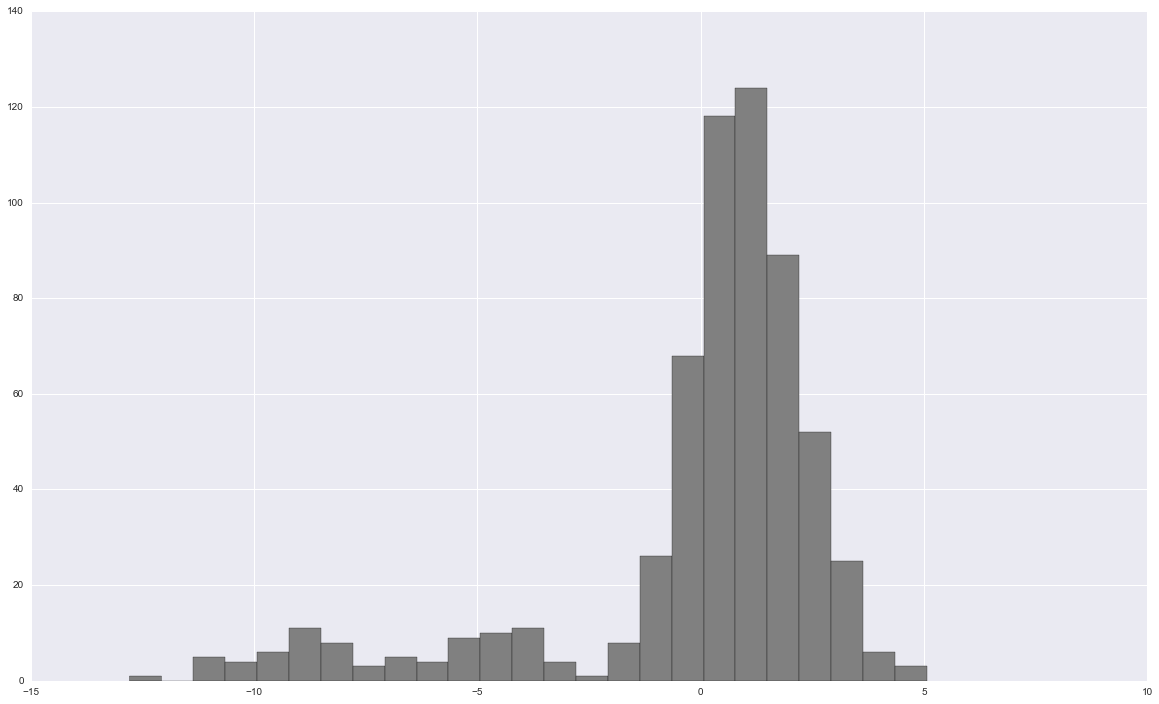

In [14]:
residuals = (model.predict(X) - y)
bins = np.round(np.sqrt(len(residuals)),0)

plt.figure(figsize = (20,12))

plt.hist(residuals, bins = bins, color = "grey")

### Fix the Code!
One of the best ways to learn how to code is to break your code, read the error, fix it and break it again. Jupyter notebook is great for breaking your code because worse comes to worse, you can just re-run everything above and try again. Below is a couple of easy fixes that will help you look at what is wrong!

The Goal: It needs to be automatic that you can look at the error and identify what is happening. Practice reading errors and documentations.

##### If you guys like this format, I can think of a couple more difficult ones with modeling

In [20]:
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/dataset")

In [25]:
df = pd.read_csv('college-majors.csv', index_col = 0)

In [26]:
np.shape(df)

(173, 11)

In [27]:
df.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [29]:
df['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [33]:
df.groupby('P25th')['Employed', 'Unemployed'].mean()

,Employed,Unemployed
P25th,,
24900,5.879900e+04,5372.000000
25000,1.307100e+04,954.000000
26100,5.128000e+03,587.000000
26200,3.338800e+04,1941.000000
27000,1.064617e+05,5834.666667
28000,8.987000e+03,665.000000
28800,4.491300e+04,3569.000000
29000,9.823650e+04,8291.500000
30000,1.035735e+05,6939.142857


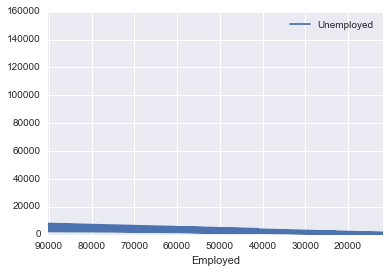

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x='Employed', y='Unemployed')

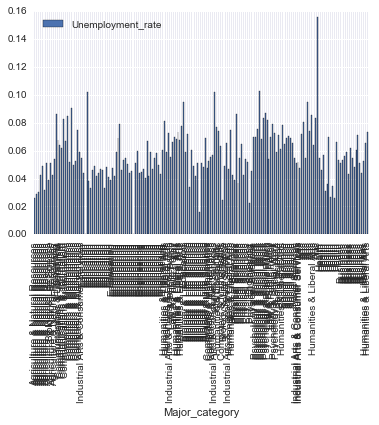

In [36]:
df.plot(x='Major_category', y='Unemployment_rate', kind='bar')

## Lesson 8 Prework

### Logistic Regression with sklearn
Logistic Regression is a classifier used when the target/outcome/dependent variable is categorical (0,1). For most simple cases, the dependent variable will only have 2 outcomes, alive/dead, male/female, pass/fail, win/lose, etc... However, logistic regression can also be used if the dependent variable has multiple outcomes, such as big/medium/small, up/down/left/right, etc... we call these multinomial logistic regression.

The goal of a logistic regression is to use independent variable(s) and predicting the probability if the dependent variable will be 0 or 1. For example, the Sigmoid (S-shaped graph) shows the probability of passing or failiing a test depending on how much studying you do: https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg

A Logistic Regression's syntax:
```
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
```

Since it is better to practice, try running a logistic regression!

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,male,37.0,10.00,no,3,18,7,4,0
2,female,27.0,4.00,no,4,14,6,4,0
3,female,32.0,15.00,yes,1,12,1,4,0
4,male,57.0,15.00,yes,5,18,6,5,0
5,male,22.0,0.75,no,2,17,6,3,0


In [42]:
affair.isnull().sum()

sex           0
age           0
ym            0
child         0
religious     0
education     0
occupation    0
rate          0
nbaffairs     0
dtype: int64

In [43]:
affair["nbaffairs"].unique()

array([ 0,  3,  7, 12,  1,  2])

In [47]:
# This will be a categorical target variable

#Lambda map
# affair.had_affairs = affair.nbaffairs.map(lambda x: 0 if x == 0 else 1)

cat = []
for x in affair["nbaffairs"]:
    if x ==0:
        cat.append(1)
    else:
        cat.append(0)

affair["had_affairs"] = cat


In [48]:
affair["had_affairs"].value_counts()

1    451
0    150
Name: had affairs, dtype: int64

<span style="color:red; font-family:Georgia; font-size:1.5em;">Don't copy and paste. Look up documentations and try to create the code. Don't read stackoverflow, it ends up being copying and pasting. Breaking codes and creating errors is the best way to learn how to code. The more errors you make, the better you'll be.</span>

In [63]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,had_affairs
1,1,37.0,10.00,0,3,18,7,4,0,1
2,0,27.0,4.00,0,4,14,6,4,0,1
3,0,32.0,15.00,1,1,12,1,4,0,1
4,1,57.0,15.00,1,5,18,6,5,0,1
5,1,22.0,0.75,0,2,17,6,3,0,1


### As done above, change sex and child to 0 and 1 categorical values

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in ["sex", "child"]:
    affair[x] = le.fit_transform(affair[x])


### Using Patsy
Make your target variable had_affairs, you choose your predictor variables

In [70]:
import patsy
y = patsy.dmatrices("had_affairs ~ sex + age + ym + child + religious + education + occupation + rate", 
                    affair)[0].tolist()

X = patsy.dmatrices("had_affairs ~ sex + age + ym + child + religious + education + occupation + rate", 
                    affair)[1].tolist()

In [73]:
cat = [True, False, False, True, True, False, True, True]

In [82]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(categorical_features = cat, sparse = False)

X2 = onehot.fit_transform(affair.iloc[:,:8])

### train_test_split
Create a training set and a testing set. Play around with different percentages to see how your model changes. Also, remember to stratify=y in the parameter so that there is an even split of 0 and 1s in the training and testing sets.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3)

### Run a Logistic Regression
So, here's a general explanation on how the training and testing set work.

If you want to see how well your training set did:
```
logreg  = LogisticRegression()
model   = logreg.fit(trainX, trainY)
predict = model.predict(trainX)
score   = model.score(trainX, trainY)
```
If you want to see if the training set was not over or underfitting:
```
logreg  = LogisticRegression()
model   = logreg.fit(trainX, trainY)
predict = model.predict(testX)
score   = model.score(testX, testY)
```

#### Logistic Regression Score of Patsy

In [92]:
lr = LogisticRegression()
algo = lr.fit(X_train,y_train)
algo.score(X_train,y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78095238095238095

In [93]:
algo.score(X_test,y_test)

0.74033149171270718

In [94]:
confusion_matrix(y_test, algo.predict(X_test))

array([[  7,  39],
       [  8, 127]])

#### Logistic Regression Score of One Hot Encoder

In [85]:
lr = LogisticRegression()
algo2 = lr.fit(X2_train,y2_train)
algo2.score(X2_train,y2_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.77619047619047621

In [88]:
algo2.score(X2_test,y2_test)

0.72375690607734811

In [91]:
confusion_matrix(y2_test, algo2.predict(X2_test))

array([[  8,  44],
       [  6, 123]])

### Create a Confusion Matrix and Classification Report

Is your model predicting well? If not, how would you improve it?

### Sigmoid Graph and Odds Ratio

Sigmoid Graphs are log function graphs (creates an S shape like this: https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png). Although it looks like it is on 0 and 1, it is actually never reaching 0.0 or 1.0. It'll go on to infinity.

Below is the equation for Odds Ratio:
### $$\text{odds ratio}(p) = \frac{p}{1-p}$$
So, what does that mean? Well, Odds Ratio and probability represent the same thing, but in a different way. The easiest way to think about Odds Ratio is betting returns!

If something has a 50% chance of happening, then the Odds Ratio is 1. Which means, if you put in 1 dollar, you'll get 1 dollar back!

Below is an example of visualizing Sigmoid Graph and why Odds Ratio is useful!

In [138]:
# This is a simple dataset of a student being admitted to a master's degree program or not
admissions = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/review and prework/review_datasets/admissions.csv')

In [139]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [140]:
admissions.shape

(400, 4)

In [141]:
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [142]:
admissions.dropna(inplace=True)

In [143]:
# Basically, since we only want to see the most prestigious people, we need to create and emulate more rows
admit = admissions[admissions.prestige == 1]

admit = pd.concat([admit]*10, axis=0)

admit.loc[admit.admit == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])
admit.loc[admit.admit == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

In [144]:
admit.shape

(610, 4)

In [145]:
y = admit.admit.values
X = admit[['gpa']].values

In [146]:
logreg = LogisticRegression()
logreg.fit(X, y)

print 'Intercept: ', logreg.intercept_
print 'Coefficients: ', logreg.coef_
print 'Logreg predicted probabilities: ', logreg.predict_proba(X)

Intercept:  [-8.13597726]
Coefficients:  [[ 2.4372946]]
Logreg predicted probabilities:  [[ 0.01737985  0.98262015]
 [ 0.67622324  0.32377676]
 [ 0.85840907  0.14159093]
 ..., 
 [ 0.14979202  0.85020798]
 [ 0.31823613  0.68176387]
 [ 0.7412399   0.2587601 ]]


In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# Calculating the baseline, when the probability of being admitted and rejected are both 50%
# The reason why you need a baseline is because if your model predicts close to a 50-50 chance, then your model
# is no better than if you flipped a fair coin

xval_chance = (-1 * logreg.intercept_[0])/logreg.coef_[0][0]
print 'predicted_y_value = 0: ', xval_chance*logreg.coef_[0][0] + logreg.intercept_
print 'GPA when admit/reject is 50/50: ', xval_chance

print 'Check probability: ', logreg.predict_proba(xval_chance)

# Having the baseline is important because we can plot it!

predicted_y_value = 0:  [ 0.]
GPA when admit/reject is 50/50:  3.33811811485
Check probability:  [[ 0.5  0.5]]


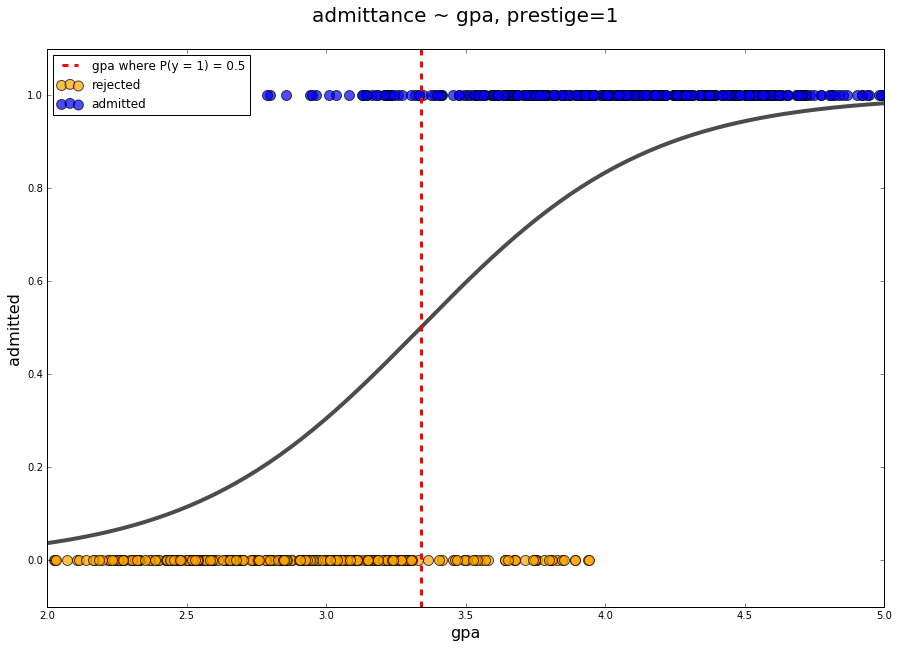

In [149]:
fig, ax = plt.subplots(figsize=(15,10))

# plot the logreg regression line for admit ~ gpa
x_vals = np.linspace(-1.,5.,300)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# A scatter plot for each type of category
ax.scatter(admit.gpa[admit.admit == 0],
           admit.admit[admit.admit == 0],
           c='orange', s=100, alpha=0.7,
           label='rejected')

ax.scatter(admit.gpa[admit.admit == 1],
           admit.admit[admit.admit == 1],
           c='blue', s=100, alpha=0.7,
           label='admitted')

# Plotting the baseline value!
ax.axvline(xval_chance, lw=3, color='red', ls='dashed',
           label='gpa where P(y = 1) = 0.5')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)

ax.set_xlim([2.,5.])
ax.set_ylim([-0.1, 1.1])

plt.legend(loc='upper left')
plt.show()

#### Interpreting your coefficients can be counter-intuitive, so we will use log odds. How?
1. We will need to center the predictor values. Centering helps a lot because now the "baseline" for the predictor, the value at 0, is the mean of the predictor. So, in our case, when gpa = 0 this is the average gpa across students.
2. Re-run our Logistic Regression!

In [150]:
X_center = X - X.mean()
print X_center[0:5,:]

[[ 1.50587109]
 [-0.45178309]
 [-0.88901774]
 [ 0.88618845]
 [ 1.2858709 ]]


In [151]:
logreg2 = LogisticRegression()
model2  = logreg2.fit(X_center, y)

print 'Intercept: ', model2.intercept_[0]
print 'Coefficients: ', model2.coef_[0][0]

Intercept:  0.382339866902
Coefficients:  3.82042695766


The combination of converting the probability to an odds ratio and taking the logarithm of that is called the **logit link function**, and is what Logistic Regression uses to estimate probability:

##### If you are wondering about the equation, you can find it through wikipedia and other sites

In [152]:
def logistic_transformation(gpa, b0, b1):
    regression_sum = b0 + b1*gpa
    exponentiated = np.exp(regression_sum)
    return exponentiated / (1 + exponentiated)

In [156]:
print 'average gpa:', np.mean(X[:,0])
print 'P(admitted | average gpa = 3.49):', logistic_transformation(0, model2.intercept_[0], model2.coef_[0][0])

average gpa: 3.4877346215
P(admitted | average gpa = 3.509): 0.59443732619


In [157]:
print 'gpa = 2.5, difference from mean:', 2.5 - np.mean(X[:,0])
print 'P(admitted | gpa = 2.5):', logistic_transformation(2.5 - np.mean(X[:,0]), 
                                                          model2.intercept_[0], model2.coef_[0][0])

gpa = 2.5, difference from mean: -0.987734621495
P(admitted | gpa = 2.5): 0.0325707355432


In [158]:
print 'gpa = 4, difference from mean:', 4 - np.mean(X[:,0])
print 'P(admitted | gpa = 4):', logistic_transformation(4. - np.mean(X[:,0]), 
                                                        model2.intercept_[0], model2.coef_[0][0])

gpa = 4, difference from mean: 0.512265378505
P(admitted | gpa = 4): 0.9120889755


### ROC / AUC

Response Operating Curve/Receiver Operating Characteristic and Area Under the Curve are the official names. I will explain it in more detail on what it does later.

Below is a function I wrote a while back that does train_test_split, Logistic Regression and plotting a ROC curve.

trainX shape:  (427, 1) 
testX shape: (183, 1)
trainY shape:  (427,) 
testY shape: (183,)
Model Score:  0.896174863388


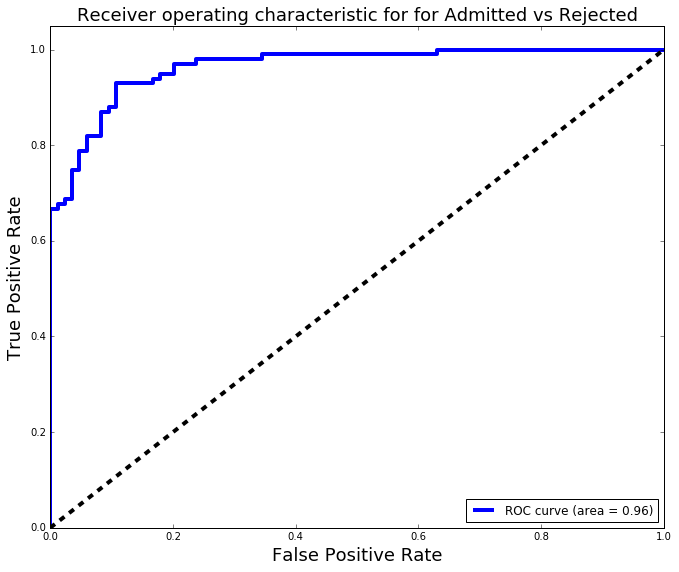

In [163]:
from sklearn.metrics import roc_curve, auc

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression()
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for %s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='for Admitted vs Rejected')

The ROC/AUC curve plots the True Positives vs False Positive. The dotted line is the baseline, which is 50% (area = 0). In order for your model to be predicting well, you need a high area between the curve and the baseline. A good model will have a positive area, while a really bad model will have a negative area.

We want to limit the false positives because we don't want our model to cause Type II errors.

## Create a Classification Report and Confusion Matrix and see how it relates with the ROC/AUC curve above. Is this a good model?

<span style="color:red; font-family:Georgia; font-size:1.5em;">Again, try to remember what the imports are and read the documentation for the parameters.</span>